<a href="https://colab.research.google.com/github/ccwu0918/F0713-CPlusPlus/blob/main/C%2B%2B_Chapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 班級: 資工一  學號: 13913001 姓名: 吳佳駿

In [ ]:
!pip install nvcc4jupyter

In [ ]:
%load_ext nvcc4jupyter

In [ ]:
!nvcc --version

#**Chapter 11: 結構與其它資料型態**



#11.1 結構
#11.1.1 結構的宣告 (Page 11-2)

結構可以同時存放不同型態的資料於同一個結構體

結構的定義及宣告格式如下：

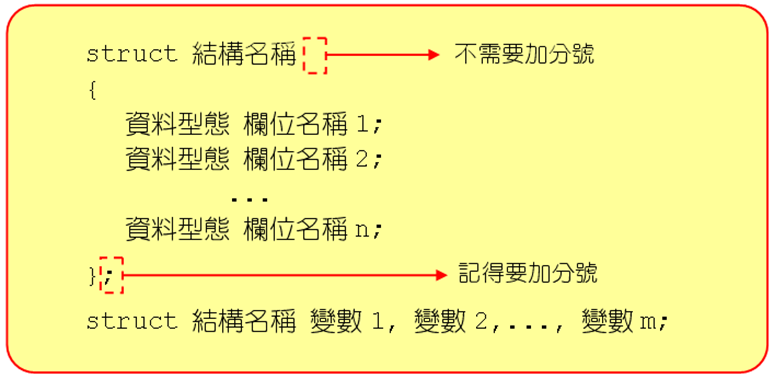

下面是結構定義及宣告範例

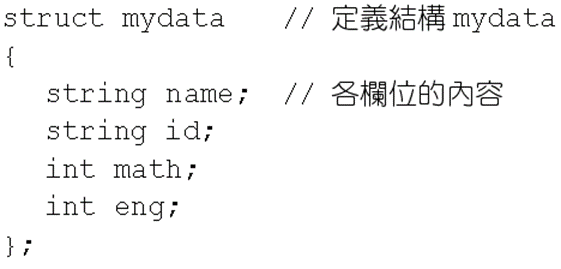

您也可以用下列的格式來宣告結構

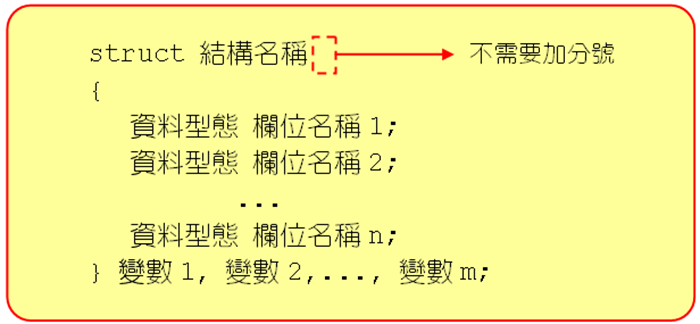

下面的結構定義及宣告範例為合法的格式：

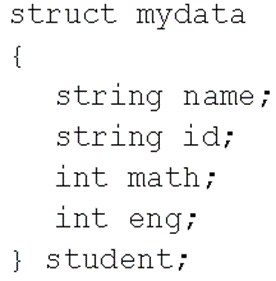

結構變數 student 在記憶體中的情形：

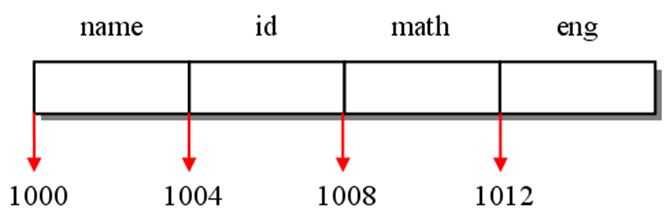

#11.1.2 結構變數的使用及初值的設定: prog11_1 (Page 11-4)

結構變數的使用格式如下：

結構內的成員可以利用小數點（.）來存取  

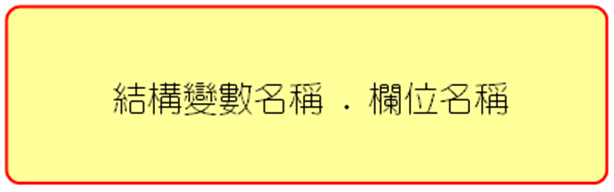

下面的程式示範結構變數的輸入與輸出：

In [ ]:
%%writefile prog11_1.cpp
// prog11_1, 結構變數的輸入與輸出
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
struct mydata		                         // 定義並宣告結構變數
{
    string name;
    int math;
} student;
int main(void)
{
   cout << "Student's name:";   			 // 輸入結構變數
   getline(cin, student.name);
   cout << "Math score:";
   cin >> student.math;
   cout << "*****Output*****" << endl;   	 // 輸出結構變數內容
   cout << student.name << "'s Math score is " << student.math;

   // system("pause");
   return 0;
}

In [ ]:
!g++ prog11_1.cpp -o prog11_1

In [ ]:
!./prog11_1

#11.1.2 結構變數的使用及初值的設定: prog11_2 (Page 11-5)

結構所佔用的記憶體有多少呢？請看看下面的程式範例：

In [ ]:
%%cuda
// prog11_2, 結構的大小
#include <iostream>
#include <cstdlib>
using namespace std;
struct mydata	      // 定義結構
{
   string name;
   int math;
} student;
int main(void)
{
   cout << "sizeof(student)=" << sizeof(student) << endl;

   // system("pause");
   return 0;
}

宣告結構變數並為其設值的範例：

用設定運算子（=）來設定結構變數的初值。

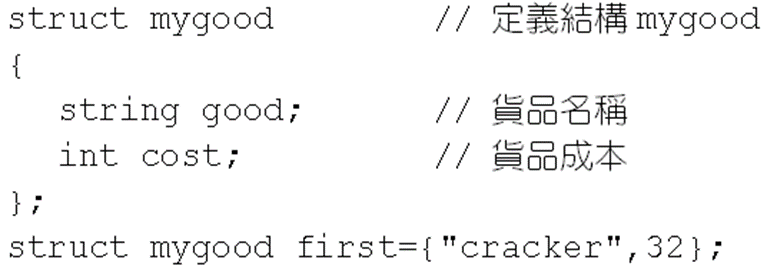

在結構定義之後，直接宣告並設定變數的初值 ：

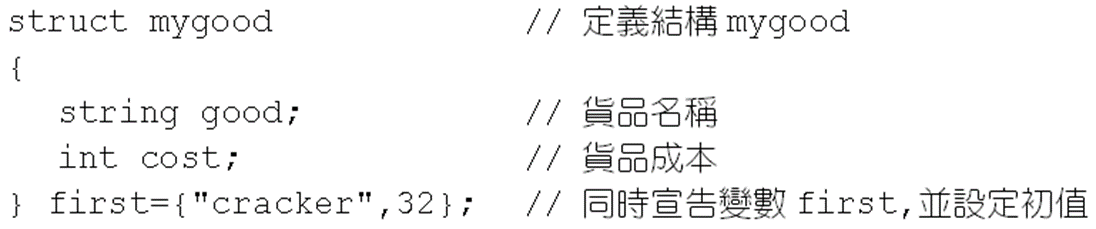

#11.1.2 結構變數的使用及初值的設定: prog11_3 (Page 11-7)

下面是設定結構變數初值的程式範例：

In [ ]:
%%cuda
// prog11_3, 結構變數的初值設定
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
struct mydata	                        // 定義並宣告結構變數
{
   string name;
   int math;
} student={"Mary Wang", 74};                   // 設定結構變數初值
int main(void)
{
   cout << "Student's name: " << student.name;      // 輸出結構變數內容
   cout << endl << "math score = " << student.math << endl;

   // system("pause");
   return 0;
}

#11.1.2 結構變數的使用及初值的設定: prog11_4 (Page 11-8)

將結構變數x設給另一個結構變數y的練習的程式範例：

In [ ]:
%%cuda
// prog11_4, 結構的設值
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
struct mydata	        // 定義結構
{
   string name;
   int age;
} x;			    // 宣告結構變數
int main(void)
{
   struct mydata y={"Lily Chen", 18};
   x = y;
   //輸出結構變數內容
   cout << "x.name = " << x.name << ", x.age = " << x.age << endl;
   cout << "y.name = " << y.name << ", y.age = " << y.age << endl;

   // system("pause");
   return 0;
}

#11.2 以結構為引數傳遞到函數

#11.2.1 將整個結構傳遞到函數: prog11_5 (Page 11-9, 11-10)

下面列出將結構傳遞到函數中的格式：


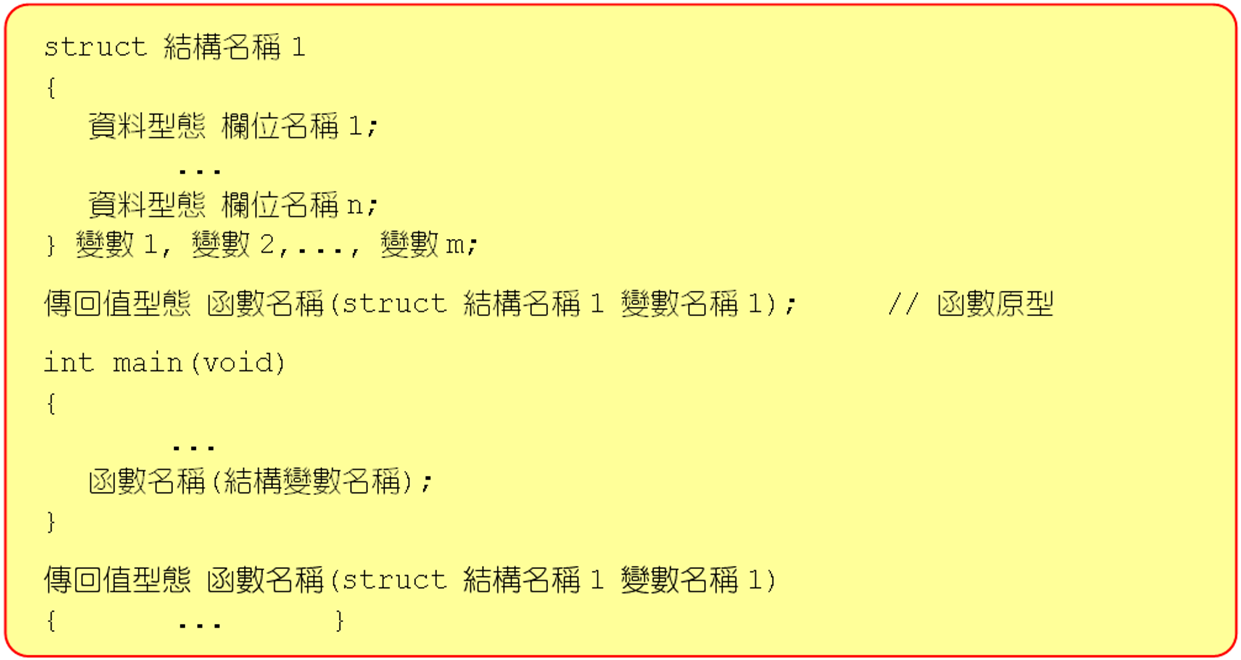

下面的程式，是將結構變數當成引數傳入函數中的範例：

In [ ]:
%%cuda
// prog11_5, 結構與函數
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
struct mydata				      // 定義結構
{
   string name;
   int age;
};
void func(struct mydata);                // 函數原型
int main(void)
{
   struct mydata woman={"Mary Wu", 5};       // 宣告結構變數
   cout << "before process..." << endl;
   cout << "In main(), " << woman.name;     // 印出結構變數內容
   cout << "'s age is " << woman.age << endl;
   cout << "after process..." << endl;
   func(woman);	         		   // 呼叫func()函數
   cout << "In main(), " << woman.name;
   cout << "'s age is " << woman.age << endl;

   // system("pause");
   return 0;
}

void func(struct mydata a)	             // 自訂函數func()
{
   a.age += 10;
   cout << "In func(), " << a.name;        // 印出結構變數內容
   cout << "'s age is " << a.age << endl;
   return;
}

#11.2.2 將整個結構傳遞到函數: prog11_6 (Page 11-11, 11-12)

程式prog11_6僅將結構變數的部分欄位傳入函數的範例：


In [ ]:
%%cuda
// prog11_6, 將結構欄位分別傳遞到函數
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
struct mydata	                 // 定義結構
{
   string name;
   int math;
   int eng;
};
float avg(int, int);                 // 函數原型
int main(void)
{
   struct mydata num = {"Alice", 71, 80};   // 宣告結構變數
   cout << num.name << "'s Math score = " << num.math;    // 印出結構變數內容
   cout << endl << "English score = " << num.eng << endl;
   cout << "average = " << avg(num.math, num.eng) << endl;

   // system("pause");
   return 0;
}

float avg(int a,int b)	            // 自訂函數avg()
{
   return (float)(a+b)/2;
}


#11.2.3 傳遞結構的位址：prog11_7 (Page 11-12, 11-13)

下面的程式利用指標的方式傳遞結構變數到函數的範例：


In [ ]:
%%cuda
// prog11_7, 以指標傳遞結構到函數
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
struct data			                  // 定義結構
{
	string name;
	int a, b;
};
void change(struct data *), prnstr(struct data);       // 函數原型
int main(void)
{
   struct data first = {"David Young", 9, 2}; 	   // 宣告結構變數
   prnstr(first);
   cout << "after process..." << endl;
   change(&first);
   prnstr(first);

   // system("pause");
   return 0;
}

void change(struct data *ptr)		              // 自訂函數change()
{
   int temp;
   temp = ptr->a;            // ptr->a可取出ptr所指向之結構的欄位a之值
   ptr->a = ptr->b;           // 取出欄位b的值，並設定給欄位a存放
   ptr->b = temp;            // 將temp設定給ptr所指向之結構的欄位b存放
   return;
}

void prnstr(struct data in)		                  // 印出結構變數內容
{
   cout << "name = "<< in.name << endl;
   cout << "a = " << in.a << "\t";
   cout << "b = " << in.b << endl;
   return;
}

# 11.3 共同空間

# 11.3.1 共同空間的定義及宣告


*   共同空間又稱為聯合或同位，它是利用同一塊共用的空間來存放資料，其格式可依需要變更
*   共同空間可以讓多種不同型態的變數共用同樣的記憶體空間，以達到節省記憶體的目的

共同空間的定義及宣告方式之格式如下：

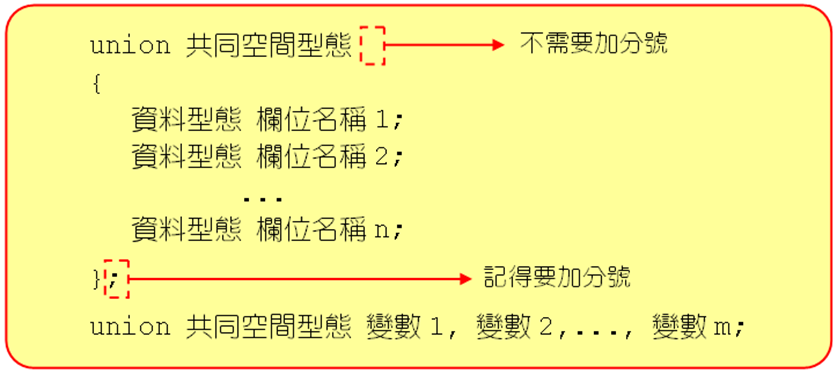

下面是共同空間定義及宣告的範例：

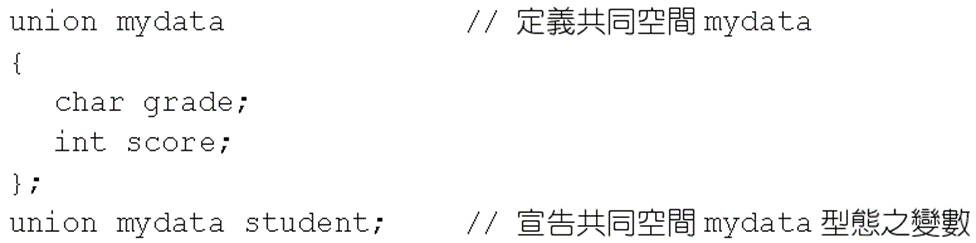

共同空間的定義及宣告格式的另一種方式：

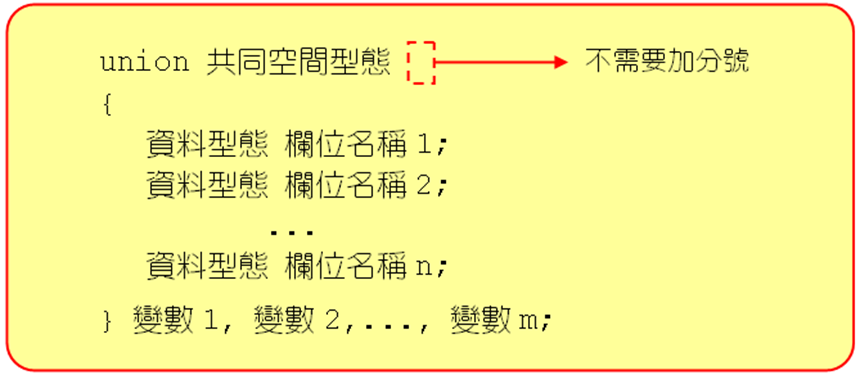

下面的共同空間定義及宣告範例為合法的格式：

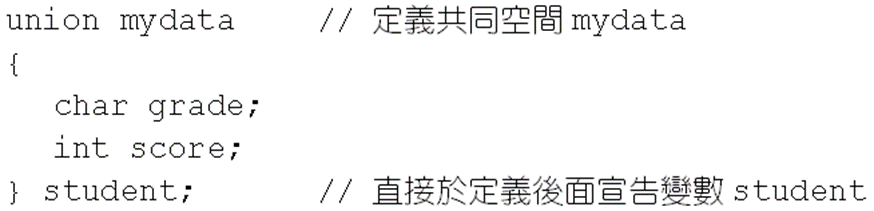

#11.3.2 共同空間的使用及初值的設定：prog11_8 (Page 11-16, 11-17)

下面的程式是共同空間的使用範例：


In [ ]:
%%writefile prog11_8.cpp
// prog11_8, 共同空間的使用
#include <iostream>
#include <cstdlib>
using namespace std;
union mydata		// 定義共同空間
{
   char grade;
   int score;
} student;			// 宣告共同空間變數
int main(void)
{
   char sex;
   do {
      cout << "Your sex is (1)Male (2)Female: "; 	// 輸入性別
      cin.get(sex);
      cin.get();      	                // 吸收多餘的enter值
   } while((sex > '2') || (sex < '1'));
   if (sex == '1')
   {
      cout << "Input score:";
      cin >> student.score;
   }
   else
   {
      cout << "Input grade: ";
      cin.get(student.grade);
   }
   cout << "**** Output ****" << endl;			// 輸出
   if (sex == '1')
      cout << "student.score = " << student.score << endl;
   else
      cout << "student.grade = " << student.grade << endl;

   // system("pause");
   return 0;
}

In [ ]:
!g++ prog11_8.cpp -o prog11_8

In [ ]:
!./prog11_8

#11.3.2 共同空間的使用及初值的設定：prog11_9 (Page 11-18, 11-19)

下面是設定共同空間變數初值的範例：


In [ ]:
%%cuda
// prog11_9, 共同空間的設值
#include <iostream>
#include <cstdlib>
using namespace std;
union mydata   		   // 定義共同空間
{
   int score;
   char grade;
} student = {65};		// 宣告共同空間變數
int main(void)
{
   cout << "sizeof(student) = " << sizeof(student) << endl;
   cout << "student.score = "  << student.score << endl;

   // system("pause");
   return 0;
}

#11.3.3 共同空間與結構的差異：prog11_10 (Page 11-20, 11-21)

下面的程式可驗證共同空間記憶體的安排的程式範例：


In [ ]:
%%cuda
// prog11_10, 共同空間的大小及位址
#include <iostream>
#include <cstdlib>
using namespace std;
union mydata	  // 定義共同空間
{
   short math;
   float avg;
} student;
int main(void)
{
   cout << "sizeof(student) = " << sizeof(student) << endl;
   cout << "address of student.math = " << &student.math << endl;
   cout << "address of student.avg = " << &student.avg << endl;

   // system("pause");
   return 0;
}

共同空間在記憶體的配置情形：

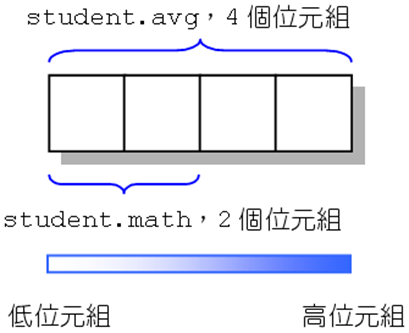

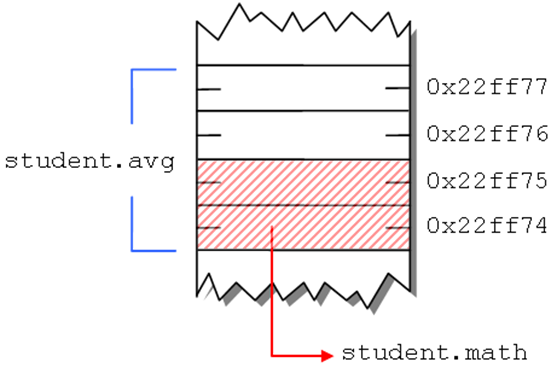

#11.3.3 共同空間與結構的差異：prog11_11 (Page 11-22, 11-23)

下面的程式可驗證結構記憶體的安排的程式範例：


In [ ]:
%%cuda
// prog11_11, 結構的大小及位址
#include <iostream>
#include <cstdlib>
using namespace std;
struct mydata	// 定義結構
{
   short math;
   float avg;
} student;
int main(void)
{
   cout << "sizeof(student) = " << sizeof(student) << endl;
   cout << "address of student.math = " << &student.math << endl;
   cout << "address of student.avg = " << &student.avg << endl;

   // system("pause");
   return 0;
}

結構的各欄位並非共用同一個記憶體區塊：

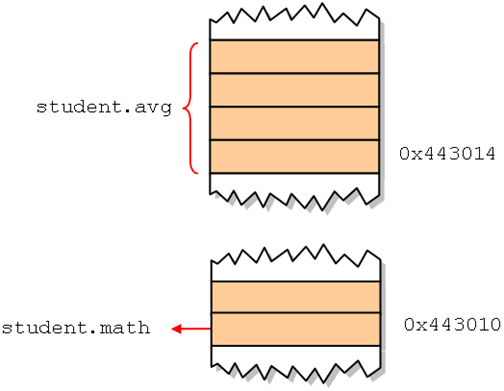

#11.4 列舉型態

#11.4.1 列舉型態的定義及宣告： (Page 11-24)

列舉型態可以定義某種資料型態，並設定此資料型態內所包含的成員，以方便程式碼的撰寫

列舉型態的定義及宣告格式如下：




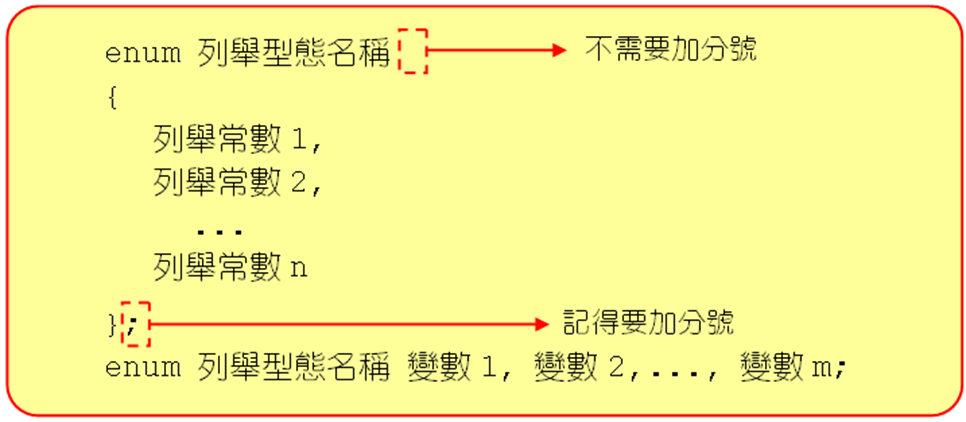

下面為列舉型態定義及宣告的範例：

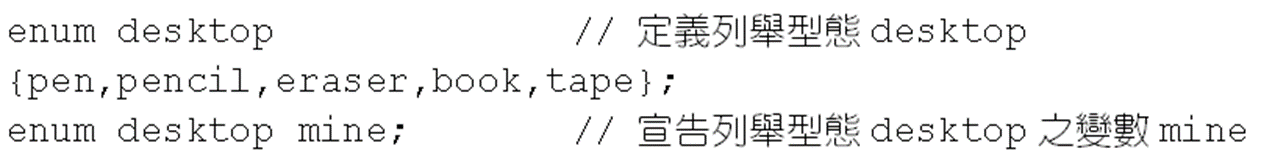

列舉型態的定義及宣告格式之另一種方式：

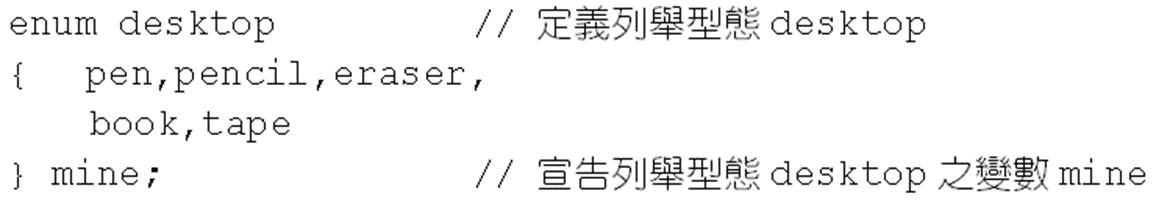


#11.4.2 列舉型態的使用與初值的設定： (Page 11-25)




*   列舉型態會自動轉換成整數型態
*   整數型態不會自動轉換成為列舉型態  
*   整數與列舉型態的轉換格式



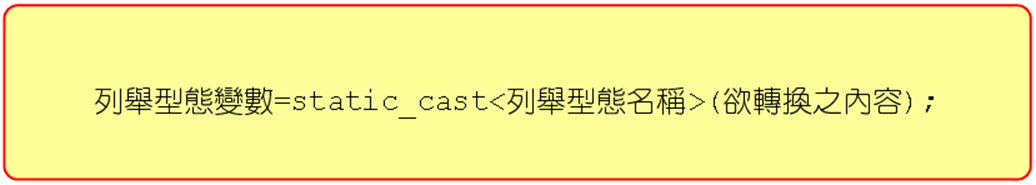

下面列出合法與不合法的設值方式：

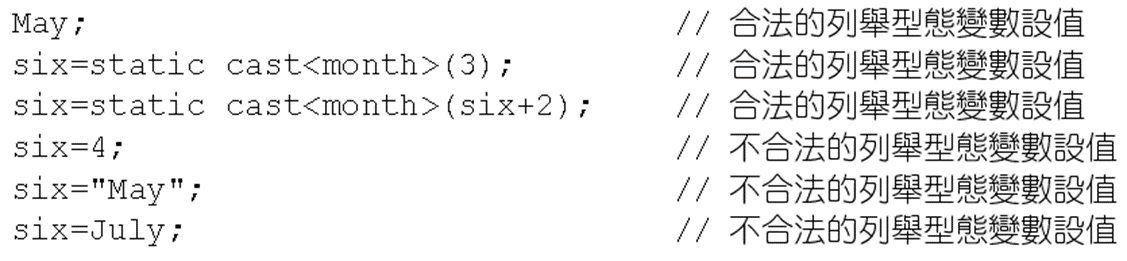


#11.4.2 列舉型態的使用與初值的設定：prog11_12 (Page 11-27)

下面的程式示範列舉型態變數的使用方式的範例：

In [ ]:
%%cuda
// prog11_12, 列舉型態的使用
#include <iostream>
#include <cstdlib>
using namespace std;
enum month	// 定義列舉型態
{	January, February, March,
    April, May, June } six;
int main(void)
{
   cout << "sizeof(six) = " << sizeof(six) << endl; // 列舉型態的長度
   cout << "January = "   << January << endl;   // 印出列舉常數的值
   cout << "February = "  << February << endl;
   cout << "March = "    << March << endl;
   cout << "April = "    << April << endl;
   cout << "May = "     << May << endl;
   cout << "June = "    << June << endl;

   // system("pause");
   return 0;
}


#11.4.2 列舉型態的使用與初值的設定：prog11_13 (Page 11-28)

列舉常數值會由所設定的值開始遞增，如下面的程式範例：

In [ ]:
%%cuda
// prog11_13, 列舉常數的設值
#include <iostream>
#include <cstdlib>
using namespace std;
enum month	                        // 定義列舉型態
{	January, February, March = 4,			     // 將March設值為4
    April,May,June } six;
int main(void)
{
   cout << "January = " << January << endl;    // 印出列舉常數的值
   cout << "February = " << February << endl;
   cout << "March = " << March << endl;
   cout << "April = " << April << endl;
   cout << "May = " << May << endl;
   cout << "June = " << June << endl;

   // system("pause");
   return 0;
}


#11.4.2 列舉型態的使用與初值的設定：prog11_14 (Page 11-29)

下面的程式是將列舉型態中的列舉常數印出的範例：

In [ ]:
%%cuda
// prog11_14, 列舉型態的使用
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
enum month	                 // 定義列舉型態
{	January, February, March,
    April, May, June } six;
int main(void)
{
   string a[6]={"January", "February", "March",
          "April", "May", "June"};
   for( six = January; six <= June; six = static_cast<month>(six + 1))
      cout << "six(" << six << ")=" << a[six] << endl;

   // system("pause");
   return 0;
}


#11.4.2 列舉型態的使用與初值的設定：prog11_15 (Page 11-30, 11-31)

下面的程式是利用列舉型態模擬滑鼠的三個按鈕的範例：

In [ ]:
%%cuda
// prog11_15, 列舉型態的使用
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   enum mykey	                    // 定義列舉型態
   {
      left, right, middle
   } mouse;		                   // 宣告列舉型態變數
   int key;
   do	      	                 // 輸入0~2的值
   {
      cout << "Button press?(0)Left (1)Right (2)Middle: ";
      cin >> key;
   } while((key > 2)||(key < 0));
   mouse = static_cast<mykey>(key);
   switch(mouse)	                  // 根據key的值印出字串
   {
      case left:  cout << "Left Button Pressed!" << endl;
                  break;
      case right: cout << "Right Button Pressed!" << endl;
                  break;
      case middle:cout << "Middle Button Pressed!" << endl;
   }

   // system("pause");
   return 0;
}


#11.4.2 列舉型態的使用與初值的設定：prog11_16 (Page 11-31, 11-32)
設定列舉變數初值的範例：





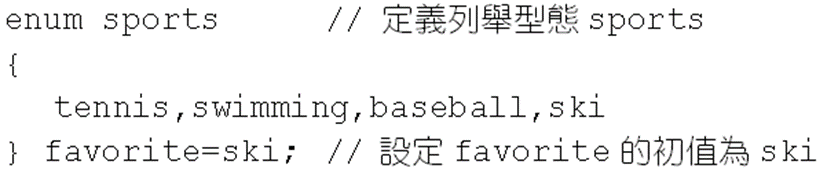

下面的程式是為列舉型態變數設值的範例：

In [ ]:
%%cuda
// prog11_16, 列舉變數的設值
#include <iostream>
#include <cstdlib>
using namespace std;
enum sports				    // 定義列舉型態
{
   tennis, swimming, baseball, ski
} favorite = ski;      	 	  // 宣告列舉變數並設值
int main(void)
{
   cout << "favorite=  ";    	// 印出列舉變數所對應的內容
   switch(favorite)
   {
      case 0: cout << "tennis" << endl;
   	           break;
      case 1: cout << "swimming" << endl;
               break;
      case 2: cout << "baseball" << endl;
  	           break;
      case 3: cout << "ski" << endl;
   }

   // system("pause");
   return 0;
}

# 11.5 使用自訂的型態─typedef

typedef是type definition的縮寫，就是定義型態之意

typedef的使用格式如下所示


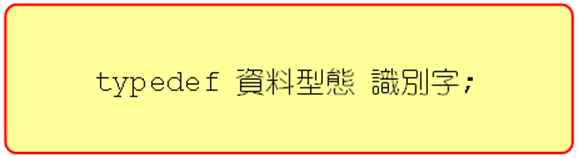

下面的型態定義及宣告範例：

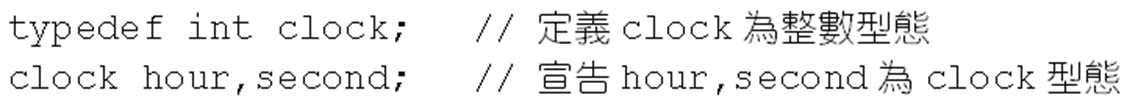

#11.5 使用自訂的型態─typedef：prog11_17 (Page 11-33, 11-34)

程式prog11_17是利用typedef自訂資料型態的範例：



In [ ]:
%%writefile prog11_17.cpp
// prog11_17, 自訂型態─typedef的使用
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   typedef float temper;		          // 定義自訂型態
   temper f, c;				          // 宣告自訂型態變數
   cout << "Input Celsius degrees: ";
   cin >> c;
   f=(float)(9.0 / 5.0) * c + 32;   	     // 轉換公式
   cout << c << " Celsius is equal to ";       // 印出轉換後的結果
   cout << f << " Fahrenheit degrees" << endl;

   // system("pause");
   return 0;
}

In [ ]:
!g++ prog11_17.cpp -o prog11_17

In [ ]:
!./prog11_17

# define與typedef

在某些情況下，#define可以取代typedef：

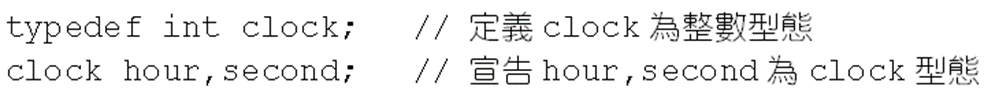

在此可將 #define取代為typedef，成為如下面的敘述：

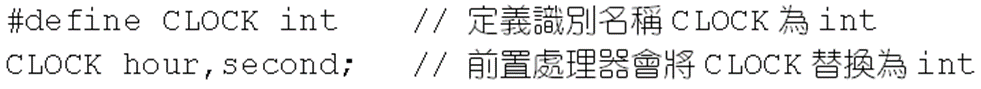



*   使用typedef時是由編譯器來執行
*   #define是由前置處理器主導



#11.5 使用自訂的型態─typedef：prog11_18 (Page 11-35, 11-36)

下面的程式是使用typedef自訂新的型態之範例：



In [ ]:
%%cuda
// prog11_18, 自訂型態─typedef的使用
#include <iostream>
#include <cstdlib>
#include <iomanip>
using namespace std;
typedef struct	                          // 定義自訂型態
{
   int hour;
   int minite;
   float second;
} mytime;
void subs(mytime t[]);    	                 // 函數原型
int main(void)
{
   int i;
   mytime t[3] = {{6, 24, 45.58f},{3, 40, 17.43f}};
   cout << setfill('0');
   subs(t);	            	           // 呼叫subs()函數，計算t[0]+t[1]
   for(i=0;i<3;i++)     	               // 印出陣列內容
   {
      cout << "t[" << i << "] = " << setw(2) << t[i].hour << ":";
      cout << setw(2) << t[i].minite << ":";
      cout << setw(5) << t[i].second << endl;
   }

   // system("pause");
   return 0;
}

void subs(mytime t[])		                // 自訂函數subs()
{
   int count2 = 0, count3 = 0;
   t[2].second = t[0].second + t[1].second;			// 秒數相加
   while(t[2].second >= 60)
   {
      t[2].second -= 60;
      count3++;
   }
   t[2].minite = t[0].minite + t[1].minite + count3; 	// 分數相加
   while(t[2].minite >= 60)
   {
      t[2].minite -= 60;
      count2++;
   }
   t[2].hour = t[0].hour + t[1].hour + count2;		// 時數相加
   return;
}



---



# 習題：11.1 結構：



### hw11_1. 試撰寫一程式，由鍵盤輸入學生資料，其項目包括學號、姓名、期中考成績、期末考成績及平時成績，其學期成績是以期中、期末考佔30%，平時成績佔40%計算。輸出項目除了該生的資料之外，還要顯示學期成績：



In [ ]:
%%writefile hw11_1.cpp
// hw11_1, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;








int main(void)
{
   cout << "Student's ID: ";
   getline(cin, student.id);
   cout << "Student's Name: ";
   getline(cin, student.name);
   cout << "期中成績: ";
   cin  >> student.score1;
   cout << "期末成績: ";
   cin  >> student.score2 ;
   cout << "平時成績: ";
   cin  >> student.score3;
   cout << "*****Output******" << endl;
   cout << student.id << endl;
   cout << student.name << endl;
   cout << "期中成績為 " << student.score1 << endl;
   cout << "期末成績為 " << student.score2 << endl;
   cout << "平時成績為 " << student.score3 << endl;
   cout << "學期成績為 " << student.score1 * 0.3 +
                  student.score2 * 0.3 +
                  student.score3 * 0.4 << endl;

   // system("pause");
   return 0;
}

/* output---------------------------
Student's ID: 95001
Student's Name: Tippi Hong
期中成績: 89
期末成績: 87
平時成績: 96
*****Output******
95001
Tippi Hong
期中成績為 89
期末成績為 87
平時成績為 96
學期成績為 91.2
----------------------------------*/

In [ ]:
!g++ hw11_1.cpp -o hw11_1

In [ ]:
!./hw11_1


### hw11_2. 試撰寫一程式，使其能夠完成下列功能：

(a)	建立一日期結構，其結構欄位包括日、月及年。

(b)	由鍵盤輸入值，並將值指定給該結構存放。

(c)	以mm/dd/yyyy的格式印出結構值。mm代表月，佔有2格；dd代表日，佔有2格；yyyy代表年，佔有4格，如06/18/2000。



In [ ]:
%%writefile hw11_2.cpp
// hw11_2, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <iomanip>
using namespace std;






int main(void)
{
   cout << "輸入年份yyyy: ";
   cin  >> date.year;
   cout << "輸入月份mm: ";
   cin  >> date.month;
   cout << "輸入日期dd: ";
   cin  >> date.day;
   cout << "*****Output******" << endl;
   cout << setfill('0');
   cout << setw(2) <<date.month << "/"
      << setw(2) << date.day << "/"
      << setw(4) <<date.year << endl;

   // system("pause");
   return 0;
}

/* output---------------------------
輸入年份yyyy: 2006
輸入月份mm: 03
輸入日期dd: 18
*****Output******
03/18/2006
----------------------------------*/

In [ ]:
!g++ hw11_2.cpp -o hw11_2

In [ ]:
!./hw11_2


### hw11_3. 試建立一個名為temperature的結構，其成員包括華氏與攝氏溫度變數f及c，由使用者選擇欲顯示的溫度計量方式，再從鍵盤輸入溫度，計算華氏與攝氏的轉換溫度。請參考下面的程式執行結果。

```
(1)華氏->攝氏
(2)攝氏->華氏
請選擇(1)或(2):1
請輸入華氏溫度: 60

**** 輸出 ****
華氏 60 度=攝氏 15.5556 度
```


註:

華氏溫度=(9/5)*攝氏溫度+32

攝氏溫度=(5/9)*華氏溫度-160/9




In [ ]:
%%writefile hw11_3.cpp
// hw11_3, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;





int main(void)
{
   char tem;
   do{
      cout << "(1)華氏->攝氏" << endl;
      cout << "(2)攝氏->華氏" << endl;
      cout << "請選擇(1)或(2):";
      cin.get(tem);
      cin.get();
   }while((tem > 50)||(tem < 49));

   if(tem == '1')
   {
      cout << "請輸入華氏溫度: ";
      cin  >> temperature.f;
   }
   else
   {
      cout << "請輸入攝氏溫度: ";
      cin  >> temperature.c;
   }
   cout << endl << "**** 輸出 ****" << endl;

   if(tem == '1')
   {

      cout << "華氏 " << temperature.f << " 度 = 攝氏 ";
      cout << temperature.c << " 度" << endl;
   }
   else
   {

      cout << "攝氏 " << temperature.c << " 度 = 華氏 ";
      cout << temperature.f << " 度" << endl;
   }

   // system("pause");
   return 0;
}

/* output---------------------------
(1)華氏->攝氏
(2)攝氏->華氏
請選擇(1)或(2):2
請輸入攝氏溫度: 32

**** 輸出 ****
攝氏 32 度=華氏 89.6 度
----------------------------------*/

In [ ]:
!g++ hw11_3.cpp -o hw11_3

In [ ]:
!./hw11_3

# 習題：11.2 以結構為引數傳遞到函數  


### hw11_4. 試利用長方體的長、寬及高建立一個結構，並將該結構值傳入函數，計算並傳回體積：



In [ ]:
%%writefile hw11_4.cpp
// hw11_4, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;






int a(int, int, int);
int main(void)
{
   struct mydata num={10,2,3};
   cout << "長=" << num.length << endl;
   cout << "寬=" << num.width << endl;
   cout << "高=" << num.hight << endl;
   cout << "體積=" <<a(num.length, num.width, num.hight) << endl;

   // system("pause");
   return 0;
}
int a(int a,int b,int c)
{
   return a*b*c;
}

/* output---------------------------
長 = 10
寬 = 2
高 = 3
體積 = 60
----------------------------------*/

In [ ]:
!g++ hw11_4.cpp -o hw11_4

In [ ]:
!./hw11_4


### hw11_5. 修改習題1的程式，使其一次可以輸入3筆學生資料。資料輸入完畢後，再輸入學號查詢，請顯示該生的學期成績：



In [ ]:
%%writefile hw11_5.cpp
// hw11_5, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;
void func(struct mydata a);









int main(void)
{
   int i,flag=0;
   string number;

   for(i=0;i<3;i++)  // Input data by array
   {
      cout << "請輸入5個位數整數的學號: ";
      getline(cin,student[i].id);
      cout << "學生姓名: ";
      getline(cin,student[i].name);
      cout << "期中成績: ";
      cin >> student[i].score1;
      cout << "期末成績: ";
      cin >> student[i].score2 ;
      cout << "平時成績: ";
      cin >> student[i].score3;
      cin.get();
      cout << endl;
   }

   cout << "輸入欲查詢的學號:";
   getline(cin, number);
   for(i = 0; i < 3; i++)
      if(number == student[i].id)
      {
         func(student[i]);
         flag = 1;
      }
   if(flag == 0)
      cout << "無此資料!!" << endl;

   // system("pause");
   return 0;
}
void func(struct mydata a)
{
   a.score4=a.score1*0.3+a.score2*0.3+a.score3*0.4;
   cout << "學號 = " << a.id << "\t" << "姓名 = " << a.name << "\t";
   cout << "學期成績 = " << a.score4 << endl << endl;
   return;
}

/* output------------------------------------
請輸入5個位數整數的學號: 95001
學生姓名: Tippi Hong
期中成績: 89
期末成績: 92
平時成績: 84

請輸入5個位數整數的學號: 95003
學生姓名: Amy Wu
期中成績: 95
期末成績: 88
平時成績: 87

請輸入5個位數整數的學號: 95002
學生姓名: Alice Wang
期中成績: 75
期末成績: 68
平時成績: 79

輸入欲查詢的學號: 95003
學號 = 950  姓名 = Amy Wu    平均成績 = 89.7
-------------------------------------------*/

In [ ]:
!g++ hw11_5.cpp -o hw11_5

In [ ]:
!./hw11_5

### hw11_6. 試著修改上題，將這3筆學生資料以下列方式列印在螢幕上。

(a) 以學號由小至大的順序

(b) 學期成績由高至低的順序




In [ ]:
%%cuda
//hw11_6, 班級: 資工一  學號: xxx 姓名: xxx
#include<iostream>
#include<cstdlib>
using namespace std;
void func(struct mydata a);
void idcmp(struct mydata &, struct mydata &, struct mydata &);
void scmp(struct mydata &, struct mydata &, struct mydata &);








student1 = {"95001", "Dodu Huang", 91, 90, 95},
student2 = {"95003", "Tippi Lee", 91, 82, 87},
student3 = {"95002", "Alice Wu", 83, 89, 84};

int main(void)
{
   student1.score4 = student1.score1 * 0.3 + student1.score2 * 0.3 +
                   student1.score3 * 0.4;
   student2.score4 = student2.score1 * 0.3 + student2.score2 * 0.3+
                   student2.score3 * 0.4;
   student3.score4 = student3.score1 * 0.3 + student3.score2 * 0.3+
                   student3.score3 * 0.4;

   cout << "***** 以學號由小至大排列 *****" << endl;
   idcmp(student1, student2, student3);
   cout << endl << "***** 學期成績由高至低排列 *****" << endl;
   scmp(student1, student2, student3);

   // system("pause");
   return 0;
}
void func(struct mydata a)
{
   cout << a.id << "\t" << a.name << "\t" << a.score4 << endl;
   return;
}
void idcmp(struct mydata &a, struct mydata &b, struct mydata &c)
{
   struct mydata max, min, mid;

   max = (a.id > b.id) ? a:b;       // 以學號由小至大排列
   max = (max.id > c.id) ? max:c;
   min = (a.id < b.id) ? a:b;
   min = (min.id < c.id) ? min:c;

   if((max.id > a.id) && (a.id > min.id))
      mid = a;
   else if((max.id > b.id) && (b.id < min.id))
      mid = b;
   else
      mid = c;
   a=min;
   b=mid;
   c=max;

   func(a);
   func(b);
   func(c);
   return;
}
void scmp(struct mydata &a, struct mydata &b, struct mydata &c)
{
   struct mydata max,min,mid;

   max=(a.score4>b.score4) ? a:b;      // 學期成績由高至低排列
   max=(max.score4>c.score4) ? max:c;
   min=(a.score4<b.score4) ? a:b;
   min=(min.score4<c.score4) ? min:c;
   if((max.score4 > a.score4) && (a.score4 > min.score4))
      mid=a;
   else if((max.score4 > b.score4) && (b.score4 > min.score4))
      mid=b;
   else
      mid=c;
   a = max;
   b = mid;
   c = min;

   func(a);
   func(b);
   func(c);
   return;
}
/* output---------------------------
***** 以學號由小至大排列 *****
95001   Dodu Huang      92.3
95002   Alice Wu        85.2
95003   Tippi Lee       86.7

***** 學期成績由高至低排列 *****
95001   Dodu Huang      92.3
95003   Tippi Lee       86.7
95002   Alice Wu        85.2
----------------------------------*/

In [ ]:
%%writefile hw11_6.cpp
//hw11_6, 班級: 資工一  學號: xxx 姓名: xxx
#include<iostream>
#include<cstdlib>
using namespace std;
void func(struct mydata a);
void idcmp(struct mydata &, struct mydata &, struct mydata &);
void scmp(struct mydata &, struct mydata &, struct mydata &);








student1 = {"95001", "Dodu Huang", 91, 90, 95},
student2 = {"95003", "Tippi Lee", 91, 82, 87},
student3 = {"95002", "Alice Wu", 83, 89, 84};

int main(void)
{
   student1.score4 = student1.score1 * 0.3 + student1.score2 * 0.3 +
                   student1.score3 * 0.4;
   student2.score4 = student2.score1 * 0.3 + student2.score2 * 0.3+
                   student2.score3 * 0.4;
   student3.score4 = student3.score1 * 0.3 + student3.score2 * 0.3+
                   student3.score3 * 0.4;

   cout << "***** 以學號由小至大排列 *****" << endl;
   idcmp(student1, student2, student3);
   cout << endl << "***** 學期成績由高至低排列 *****" << endl;
   scmp(student1, student2, student3);

   // system("pause");
   return 0;
}
void func(struct mydata a)
{
   cout << a.id << "\t" << a.name << "\t" << a.score4 << endl;
   return;
}
void idcmp(struct mydata &a, struct mydata &b, struct mydata &c)
{
   struct mydata max, min, mid;

   max = (a.id > b.id) ? a:b;       // 以學號由小至大排列
   max = (max.id > c.id) ? max:c;
   min = (a.id < b.id) ? a:b;
   min = (min.id < c.id) ? min:c;

   if((max.id > a.id) && (a.id > min.id))
      mid = a;
   else if((max.id > b.id) && (b.id < min.id))
      mid = b;
   else
      mid = c;
   a=min;
   b=mid;
   c=max;

   func(a);
   func(b);
   func(c);
   return;
}
void scmp(struct mydata &a, struct mydata &b, struct mydata &c)
{
   struct mydata max,min,mid;

   max=(a.score4>b.score4) ? a:b;      // 學期成績由高至低排列
   max=(max.score4>c.score4) ? max:c;
   min=(a.score4<b.score4) ? a:b;
   min=(min.score4<c.score4) ? min:c;
   if((max.score4 > a.score4) && (a.score4 > min.score4))
      mid=a;
   else if((max.score4 > b.score4) && (b.score4 > min.score4))
      mid=b;
   else
      mid=c;
   a = max;
   b = mid;
   c = min;

   func(a);
   func(b);
   func(c);
   return;
}
/* output---------------------------
***** 以學號由小至大排列 *****
95001   Dodu Huang      92.3
95002   Alice Wu        85.2
95003   Tippi Lee       86.7

***** 學期成績由高至低排列 *****
95001   Dodu Huang      92.3
95003   Tippi Lee       86.7
95002   Alice Wu        85.2
----------------------------------*/

In [ ]:
!g++ hw11_6.cpp -o hw11_6

In [ ]:
!./hw11_6

# 習題：11.3 共同空間

### hw11_7. 請利用共同空間型態，於程式中宣告下列的人事結構型態。


姓名：		字串型態


人事代號：	字串型態


此外，還依照填寫者的性別而有不同的欄位：女性填入中文打字速度，男性則填是否役畢。



In [ ]:
%%writefile hw11_7.cpp
//hw11_7, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <string>
using namespace std;











int main(void)
{
   cout << "姓名: ";
   getline(cin,employee.name);
   cout << "人事代號: ";
   getline(cin,employee.id);
   cout <<"性別 (1)男 (2)女: ";
   cin.get(employee.sex);
   cin.get();
   if(employee.sex=='1')
   {
      cout << "服完兵役(y/n): ";
      cin.get(a.grade);
   }
   else
   {
      cout <<"每分鐘中打速度: ";
      cin >> a.score;
      cin.get();
   }

   cout << "**** Output ****" << endl;
   cout << "姓名 = " << employee.name << endl;
   cout << "人事代號: " << employee.id << endl;

   if(employee.sex == '1')
      cout << "兵役狀況: " << a.grade << endl;
   else
      cout << "中打速度: " << a.score << endl;

   system("pause");
   return 0;
}

/* output---------------------------
姓名: Tippi Hong
人事代號: 244405
性別 (1)男 (2)女: 2
每分鐘中打速度: 65
*** Output ****
姓名 = Tippi Hong
人事代號: 244405
中打速度: 65
----------------------------------*

In [ ]:
!g++ hw11_7.cpp -o hw11_7

In [ ]:
!./hw11_7

### hw11_8. 試宣告一個可以存放int及float變數的共同空間型態，利用該共同空間變數計算其平方值，請於程式中向使用者詢問要使用何種型態：



In [ ]:
%%writefile hw11_8.cpp
// hw11_8, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;





int main(void)
{
   char tem;
   do{
      cout << "(1)以浮點數計算平方值" << endl;
      cout << "(2)以整數計算平方值" << endl;
      cout << "請選擇(1)或(2): ";
      cin.get(tem);
      cin.get();
   }while((tem > 50)||(tem < 49));

   if(tem == '1')
   {
      cout << "輸入浮點數: ";
      cin  >> num.f;
   }
   else
   {
      cout << "輸入整數: ";
      cin  >> num.i;
   }

   cout << "**** Output ****" << endl;

   if(tem=='1')
     cout << num.f << " * " << num.f << " = "
           << num.f*num.f << endl;
   else
      cout << num.i << " * " << num.i << " = "
            << num.i * num.i << endl;

   // system("pause");
   return 0;
}

/* output---------------------------
(1)以浮點數計算平方值
(2)以整數計算平方值
請選擇(1)或(2): 1
輸入浮點數: 2.5
**** Output ****
2.5 * 2.5 = 6.25
----------------------------------*/

In [ ]:
!g++ hw11_8.cpp -o hw11_8

In [ ]:
!./hw11_8

# 習題：11.4 列舉型態



### hw11_9. 試撰寫一程式，利用列舉型態將一年的12個月份以英文定義，同時，當使用者輸入1~12的整數時，才印出相對應的月份，如輸入6，印出6月的英文June。


In [ ]:
%%writefile hw11_9.cpp
// hw11_9, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;




int main(void)
{
   int i;
   string a[12] = {"January","February","March","April",
             "May","June","July","August","September",
             "October","November","December"};
   cout << "請輸入欲查詢的月份(1~12): ";
   cin >> i;
   th = static_cast<month>(i);
   cout << th << "月 = " << a[th-1] << endl;

   system("pause");
   return 0;
}

/* output---------------------------
請輸入欲查詢的月份(1~12): 6
6月 = June
----------------------------------*/

In [ ]:
!g++ hw11_9.cpp -o hw11_9

In [ ]:
!./hw11_9

### hw11_10. 試撰寫一程式，利用列舉型態將一個星期的英文列出：


In [ ]:
%%cuda
// hw11_10, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;




int main(void)
{

   string a[7] = {"Monday", "Tuesday", "Wednesday", "Thuresday",
            "Friday", "Saturday", "Sunday"};
   for(seven = Monday; seven <= Sunday; seven =              )
      cout << "星期" << seven+1 << " = " << a[seven] << endl;

   // system("pause");
   return 0;
}

/* output---------------------------
星期1 = Monday
星期2 = Tuesday
星期3 = Wednesday
星期4 = Thuresday
星期5 = Friday
星期6 = Saturday
星期7 = Sunday
----------------------------------*/

In [ ]:
%%writefile hw11_10.cpp
// hw11_10, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;




int main(void)
{

   string a[7] = {"Monday", "Tuesday", "Wednesday", "Thuresday",
            "Friday", "Saturday", "Sunday"};
   for(seven = Monday; seven <= Sunday; seven =              )
      cout << "星期" << seven+1 << " = " << a[seven] << endl;

   // system("pause");
   return 0;
}

/* output---------------------------
星期1 = Monday
星期2 = Tuesday
星期3 = Wednesday
星期4 = Thuresday
星期5 = Friday
星期6 = Saturday
星期7 = Sunday
----------------------------------*/

In [ ]:
!g++ hw11_10.cpp -o hw11_10

In [ ]:
!./hw11_10

### hw11_11. 試修改上題，當使用者輸入1~7的整數時，才印出相對應的星期，如輸入5，印出星期五的英文Friday：



In [ ]:
%%writefile hw11_11.cpp
// hw11_11, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;



int main(void)
{
   int i;
   string a[7] = {"Monday","Tuesday","Wednesday",
            "Thuresday","Friday","Saturday","Sunday"};
   cout << "請輸入1~7以顯示星期 :";
   cin >> i;
   seven =           ;
   cout << "星期" << seven << " = " << a[seven-1] << endl;

   // system("pause");
   return 0;
}

/* output---------------------------
請輸入1~7以顯示星期: 5
星期5 = Friday
----------------------------------*/

In [ ]:
!g++ hw11_11.cpp -o hw11_11

In [ ]:
!./hw11_11

### hw11_12. 試將prog11_14修改成以switch敘述完成：



In [ ]:
%%cuda
// hw11_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
enum month	// 定義列舉型態
{	January, February, March,
   April, May, June } six;
int main(void)
{
   for(six = January; six <= June; six = static_cast<month>(six + 1))
   {
      cout << "six(" << six << ") = ";













      }
   }

   // system("pause");
   return 0;
}

/* output---------------------------
six(0) = January
six(1) = February
six(2) = March
six(3) = April
six(4) = May
six(5) = June
----------------------------------*/

In [ ]:
%%writefile hw11_12.cpp
// hw11_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
enum month	// 定義列舉型態
{	January, February, March,
   April, May, June } six;
int main(void)
{
   for(six = January; six <= June; six = static_cast<month>(six + 1))
   {
      cout << "six(" << six << ") = ";













      }
   }

   // system("pause");
   return 0;
}

/* output---------------------------
six(0) = January
six(1) = February
six(2) = March
six(3) = April
six(4) = May
six(5) = June
----------------------------------*/

In [ ]:
!g++ hw11_12.cpp -o hw11_12

In [ ]:
!./hw11_12

# 習題：11.5 使用自訂的型態─typedef  


### hw11_13. 請參考prog11_18的程式碼，定義一個my_time型態的結構，同時宣告my_time型態的結構陣列t，利用函數計算t[2]=t[0]-t[1]的結果後，將整個陣列印出來：

In [ ]:
%%cuda
// hw11_13, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <iomanip>
using namespace std;






void mius(mytime t[]);    	// 函數原型
int main(void)
{
   int i;
   mytime t[3] = {{6, 24, 17.43f},{3, 40, 45.58f}};
   cout << setfill('0');
   mius(t);	            	  // 呼叫mius()函數，計算t[0]-t[1]
   for(i=0;i<3;i++)     	      // 印出陣列內容
   {
      cout << "t[" << i << "] = " << setw(2) << t[i].hour << ":";
      cout << setw(2) << t[i].minite << ":";
      cout << setw(5) << t[i].second << endl;
   }
   // system("pause");
   return 0;
}

void mius(mytime t[])		       // 自訂函數mius()
{
   t[2].hour = t[0].hour - t[1].hour;	 // 時數相減
   t[2].minite = t[0].minite - t[1].minite;	// 分數相減
   while(t[2].minite < 0)
   {
      t[2].hour--;
      t[2].minite += 60;
   }
   t[2].second = t[0].second - t[1].second;	// 秒數相減
   while(t[2].second < 0)
   {
      t[2].minite--;
      t[2].second += 60;
   }
   return;
}

/* output---------------------------
t[0] = 06:24:17.43
t[1] = 03:40:45.58
t[2] = 02:43:31.85
----------------------------------*/

In [ ]:
%%writefile hw11_13.cpp
// hw11_13, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <iomanip>
using namespace std;






void mius(mytime t[]);    	// 函數原型
int main(void)
{
   int i;
   mytime t[3] = {{6, 24, 17.43f},{3, 40, 45.58f}};
   cout << setfill('0');
   mius(t);	            	  // 呼叫mius()函數，計算t[0]-t[1]
   for(i=0;i<3;i++)     	      // 印出陣列內容
   {
      cout << "t[" << i << "] = " << setw(2) << t[i].hour << ":";
      cout << setw(2) << t[i].minite << ":";
      cout << setw(5) << t[i].second << endl;
   }
   // system("pause");
   return 0;
}

void mius(mytime t[])		       // 自訂函數mius()
{
   t[2].hour = t[0].hour - t[1].hour;	 // 時數相減
   t[2].minite = t[0].minite - t[1].minite;	// 分數相減
   while(t[2].minite < 0)
   {
      t[2].hour--;
      t[2].minite += 60;
   }
   t[2].second = t[0].second - t[1].second;	// 秒數相減
   while(t[2].second < 0)
   {
      t[2].minite--;
      t[2].second += 60;
   }
   return;
}

/* output---------------------------
t[0] = 06:24:17.43
t[1] = 03:40:45.58
t[2] = 02:43:31.85
----------------------------------*/

In [ ]:
!g++ hw11_13.cpp -o hw11_13

In [ ]:
!./hw11_13

### hw11_14. 下面的程式是利用typedef定義一個點在（x,y）座標上的位置之結構，其結構成員包括x座標值與y座標值，並利用此結構求出兩點之間的距離。請將程式空白的部分填入正確的答案：



```
#include <iostream>
#include <cstdlib>
#include <math>
using namespace std;
typedef struct
{
   double x;
   double y;
} point;
int main(void)
{
   double square;
         p1,p2;
   p1.x=p1.y=0;
   p2.x=0;
   p2.y=3;
   cout << "p1=(" <<       << "," <<        << "), ";
   cout << "p2=(" <<       << "," <<       << ")" << endl;
   square=					;
   cout << "distance(p1,p2)=" << sqrt(      ) << endl;
   system("pause");
   return 0;

```



In [ ]:
%%cuda
// hw11_14, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <math.h>
using namespace std;
typedef struct
{
   double x;
   double y;
} point;
int main(void)
{
   double square;
      p1,p2;
   p1.x=p1.y=0;
   p2.x=0;
   p2.y=3;
   cout << "p1 = (" <<      << ", " <<      << "), ";
   cout << "p2 = (" <<      << ", " <<      << ")" << endl;
   square =
   cout << "distance(p1, p2) = " << sqrt(     ) << endl;
   system("pause");
   return 0;
}

/* output---------------------------
p1 = (0, 0), p2 = (0, 3)
distance(p1, p2) = 3
----------------------------------*/

In [ ]:
%%writefile hw11_14.cpp
// hw11_14, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
#include <math.h>
using namespace std;
typedef struct
{
   double x;
   double y;
} point;
int main(void)
{
   double square;
      p1,p2;
   p1.x=p1.y=0;
   p2.x=0;
   p2.y=3;
   cout << "p1 = (" <<      << ", " <<      << "), ";
   cout << "p2 = (" <<      << ", " <<      << ")" << endl;
   square =
   cout << "distance(p1, p2) = " << sqrt(     ) << endl;
   system("pause");
   return 0;
}

/* output---------------------------
p1 = (0, 0), p2 = (0, 3)
distance(p1, p2) = 3
----------------------------------*/

In [ ]:
!g++ hw11_14.cpp -o hw11_14

In [ ]:
!./hw11_14

#**Reference**
C++ Tutorial
https://www.w3schools.com/cpp/cpp_strings.asp

https://www.learn-cpp.org/en/Variables_and_Types

How to Run CUDA C or C++ on Jupyter (Google Colab)

https://www.wikihow.com/Run-CUDA-C-or-C%2B%2B-on-Jupyter-(Google-Colab)

Code block
http://www.codeblocks.org/downloads/26

Freebootcamp
https://www.freecodecamp.org/

ntroduction to C++ Programming in Urdu
https://www.youtube.com/watch?v=dnCO124Uk1o

6 Sentiment Analysis Projects with Python

https://amankharwal.medium.com/6-sentiment-analysis-projects-with-python-1fdd3d43d90f

C++ 教學講義

https://hackmd.io/@MECode/CPP